# **Task: Data Exploration and Preprocessing**

### **Explore the Dataset and Identify the number of rows and columns.**

In [1]:
import pandas as pd
from google.colab import files

# Upload the csv file
uploaded = files.upload()

# Get the correct filename
file_name = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(file_name)

# Check if the dataset is loaded correctly
print(df.head())

Saving Dataset .csv to Dataset .csv
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ort

**Count Rows and Columns**

In [3]:
rows, columns = df.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns:{columns}")

Number of Rows: 9551
Number of Columns:21


**Save Output in a File**

In [4]:
output_text = f"Number of Rows: {rows}\nNumber of Columns:{columns}"

# Define the output file name
output_file = "dataset_shape.txt"

# Write to the file
with open(output_file, "w") as file:
    file.write(output_text)

print("File saved successfully")

File saved successfully


## **Check for missing values in each column and handle them accordingly.**

In [5]:
import pandas as pd
from google.colab import files

# Upload the csv file
uploaded = files.upload()

# Get the correct filename
file_name = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(file_name)

# Check if the dataset is loaded correctly
print(df.head())

Saving Dataset .csv to Dataset  (1).csv
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La,

**Check for Missing Values**

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Print missing values
print("Missing values in Each Column:")
print(missing_values)

Missing values in Each Column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


**Handle Missing Values**

In [13]:
# Ensure numeric columns are converted properly
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce') # Convert to numeric if not already

# Fill missing values for numerical columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for categorical columns with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col]. mode()[0])

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

print("Missing values handled successfully and saved as 'cleaned_dataset.csv'")

Missing values handled successfully and saved as 'cleaned_dataset.csv'


## **Perform data type conversion if necessary.**

## **Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.**

In [14]:
import pandas as pd
from google.colab import files

# Upload the csv file
uploaded = files.upload()

# Get the correct filename
file_name = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(file_name)

# Check if the dataset is loaded correctly
print(df.head())

Saving Dataset .csv to Dataset  (2).csv
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La,

In [15]:
# Check data types
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


**Data Type of "Aggregate rating" is numeric, conversion is not needed.**

**Analyze Distribution of "Aggregate Rating"**

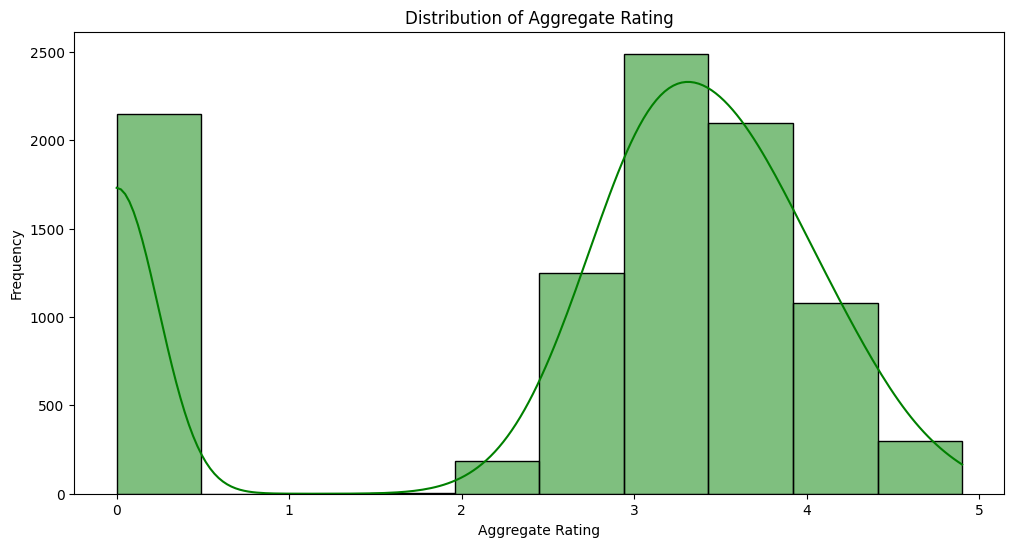

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of "Aggregate Rating"
plt.figure(figsize=(12, 6))
sns.histplot(df["Aggregate rating"], bins=10, kde=True, color="green")
plt.title("Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

**Identify Class Imbalance**

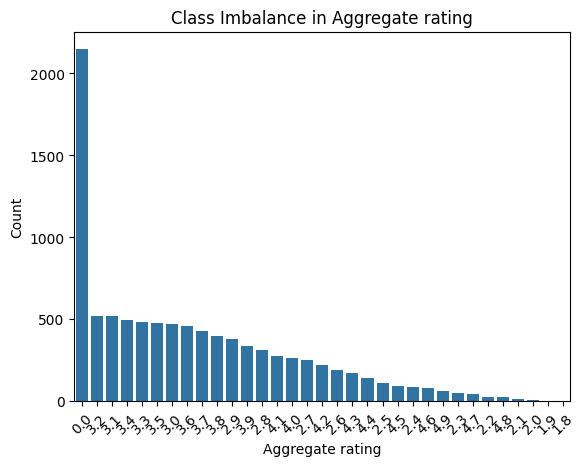

In [20]:
# Identify class imbalance
sns.countplot(x="Aggregate rating", data=df, order=df["Aggregate rating"].value_counts().index)
plt.title("Class Imbalance in Aggregate rating")
plt.xlabel("Aggregate rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## **Akankshya Sharma**